# **Simple ML Project: Iris Flower Classification (Multiple Algorithms)**

**Description:**
Classify iris flowers into 3 species (Setosa, Versicolor, Virginica) based on petal and sepal 
length/width.

**INSTALLING NECCESSARY PACKAGES**

In [5]:
import sys
!{sys.executable} -m pip install scikit-learn

# **1.DATA COLLECTION**

In [7]:
#Loading the data

from sklearn.datasets import load_iris
iris = load_iris()


In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The iris data contains measurements of **150** iris flowers, **with 4** features: **sepal length, sepal width, petal length, and petal width**.
It is classified into 3 species: **Setosa, Versicolor, and Virginica**.
The dataset is used for supervised machine learning tasks, mainly **classification**.

In [10]:
#creating pandas dataframe
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
iris_df.shape

(150, 5)

# **2.DATA EXPLORATION**

In [25]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [27]:
iris_df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

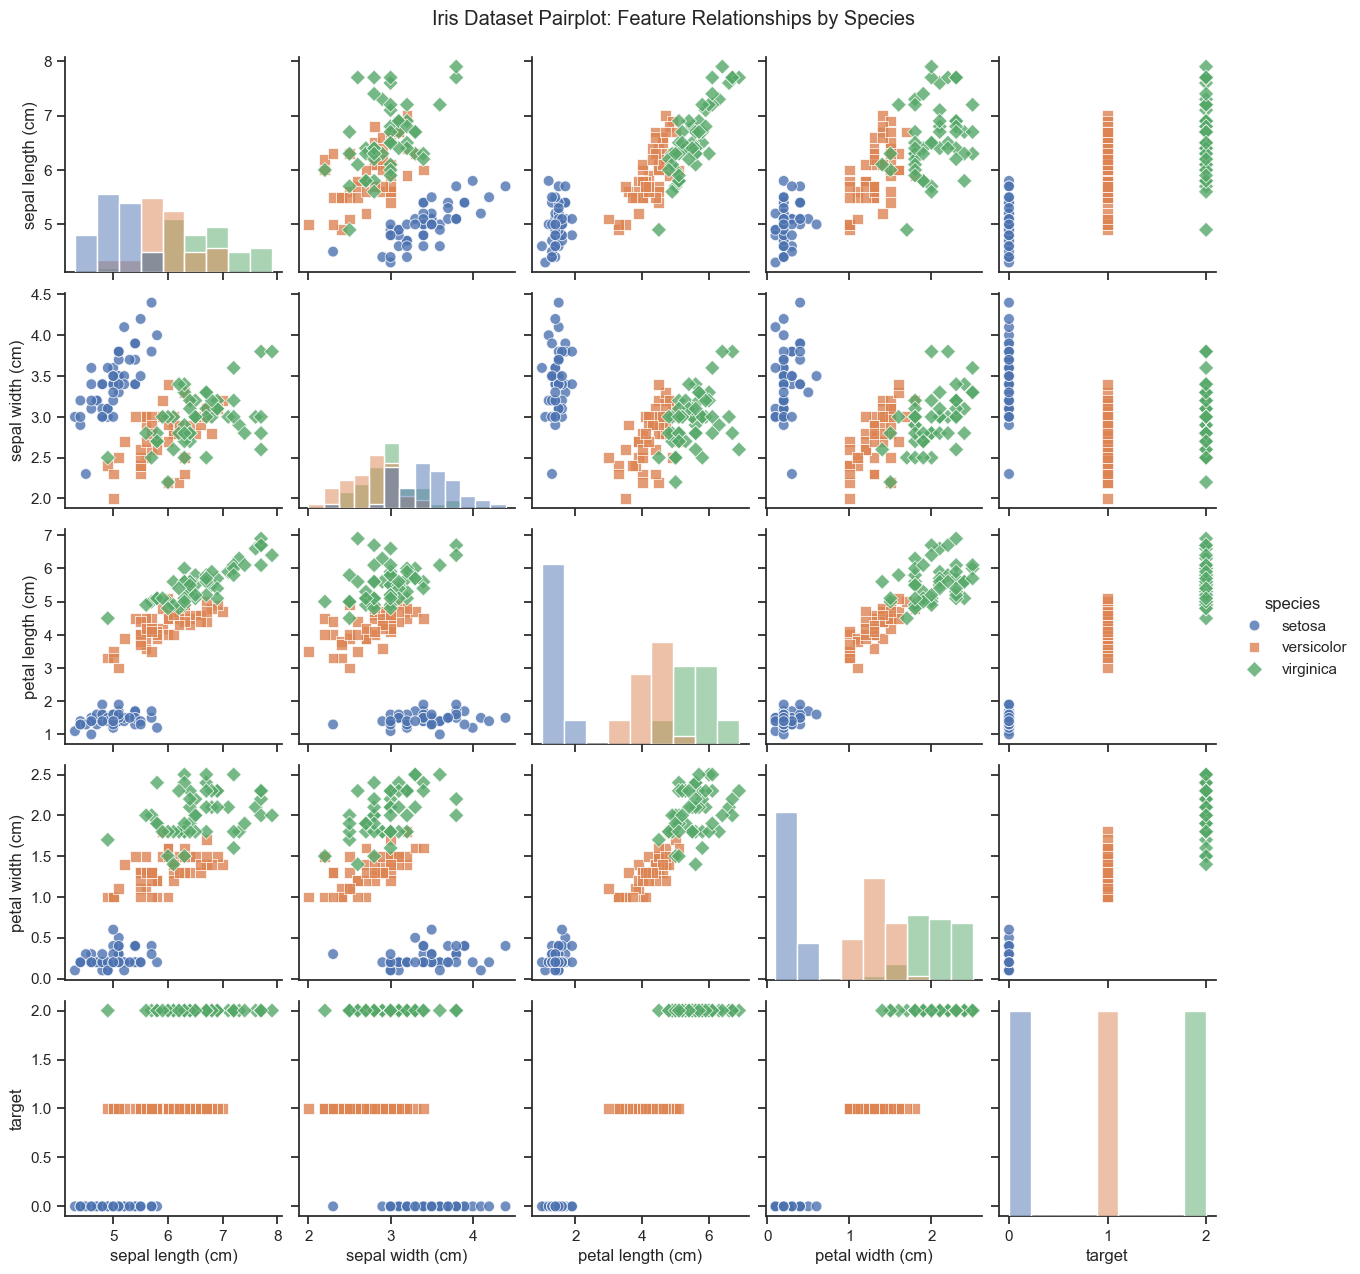

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Set seaborn style
sns.set(style="ticks")

# Create the pairplot
pairplot = sns.pairplot(
    iris_df,
    hue="species",
    diag_kind="hist",
    markers=["o", "s", "D"],
    plot_kws={'alpha': 0.8, 's': 60}
)

plt.suptitle("Iris Dataset Pairplot: Feature Relationships by Species", y=1.02)
plt.show()

**Explanation**

1. hue="species" colors the points by species.

2. diag_kind="hist" uses histograms on the diagonal.

3. markers assigns different shapes to each species.

4. plot_kws customizes point appearance.

**This pairplot will visually confirm:**

1. Scatterplots of all possible pairs of four iris features (sepal length, sepal width, petal length, petal width)
2. Histograms of each feature's distribution on the diagonal
3. Points colored by species (setosa, versicolor, virginica) with different marker shapes
4. Clear separation between species in petal-related plots, showing that:
   * Setosa has small petals and is completely distinct
   * Versicolor and virginica overlap somewhat but show different size ranges
   * Sepal measurements show more overlap between species than petal measurements
5. Correlation patterns between features, particularly strong positive correlation between petal length and width

The graph effectively demonstrates how iris species can be distinguished based on their measurements, especially petal dimensions.

# **3.FEATURE PREPROCESSING**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

In [23]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

The purpose of standardizing data with StandardScaler is to transform features to the same scale **(mean=0, std=1)**, which improves the performance of many machine learning algorithms that are sensitive to feature magnitudes.

# **4.TRAIN/TEST SPLIT**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, iris.target, test_size=0.2, random_state=42, stratify=iris.target
)

# **5.TRAIN MULTIPLE MODELS**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "model": model,
        "accuracy": acc,
        "y_pred": y_pred
    }
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Regression Accuracy: 0.933
Decision Tree Accuracy: 0.933
KNN Accuracy: 0.933


In [55]:
results

{'Logistic Regression': {'model': LogisticRegression(max_iter=200),
  'accuracy': 0.9333333333333333,
  'y_pred': array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
         1, 1, 2, 2, 1, 0, 2, 0])},
 'Decision Tree': {'model': DecisionTreeClassifier(random_state=42),
  'accuracy': 0.9333333333333333,
  'y_pred': array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
         1, 1, 2, 2, 1, 0, 2, 0])},
 'KNN': {'model': KNeighborsClassifier(),
  'accuracy': 0.9333333333333333,
  'y_pred': array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
         1, 1, 2, 1, 1, 0, 2, 0])}}

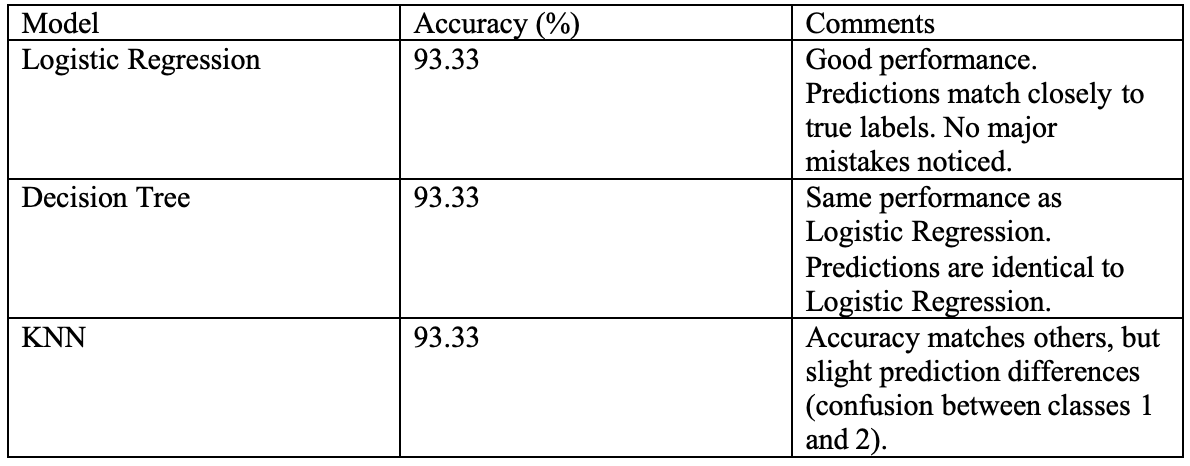

**Blunt Analysis**
* All three models achieved the same accuracy (93.33%) on the Iris test data.
* Logistic Regression and Decision Tree produced identical predictions.
* KNN's predictions differed slightly (confused class 1 and 2 at some places).
* Accuracy alone can hide model weaknesses; confusion matrix and precision-recall would reveal deeper differences.
* Dataset is small, so slight fluctuations are expected.

# **6.COMPARING RESULTS**

In [63]:
for name in results:
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, results[name]['y_pred'], target_names=iris.target_names))


Logistic Regression Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Decision Tree Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNN Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor    

Interpretation:

•	Logistic Regression and Decision Tree perform identically, handling all classes well, with slight weakness on versicolor and virginica.

•	KNN shows a trade-off: it perfectly predicts versicolor but struggles a bit with virginica (recall dropped to 0.80).

•	Despite all achieving 93% overall accuracy, Logistic Regression and Decision Tree are more consistent, while KNN is slightly unstable between classes.



# **6.VISUALIZING CONFUSION MATRICES**

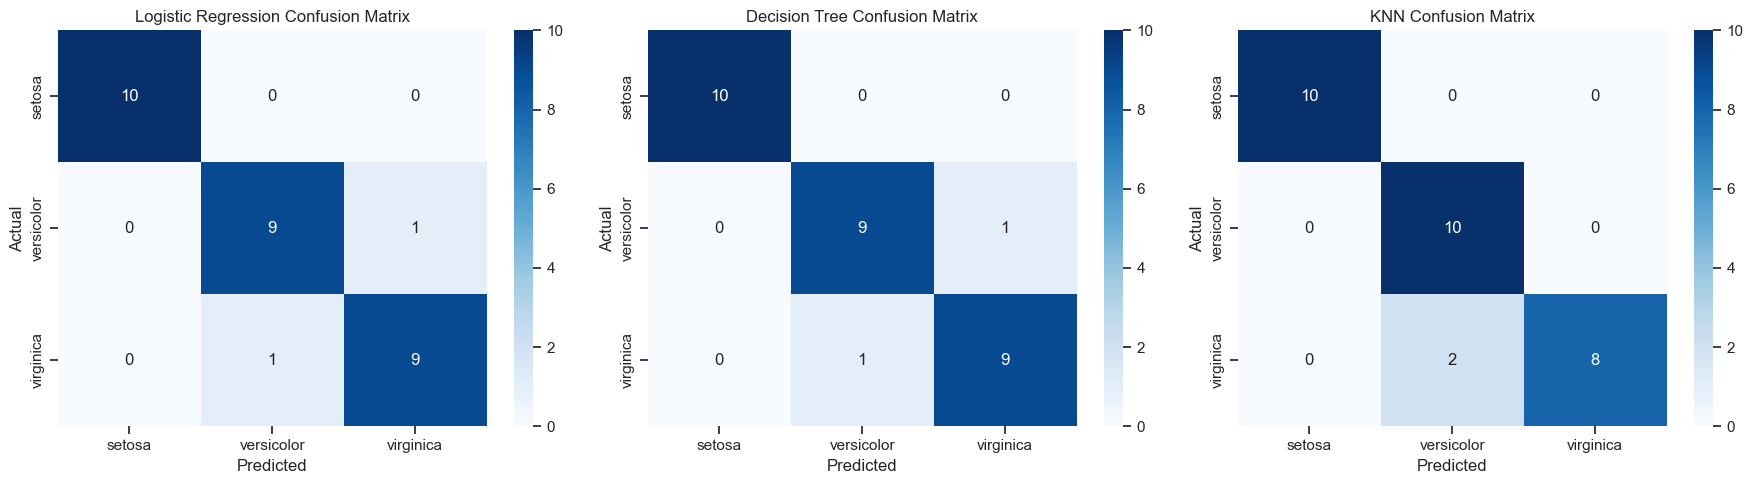

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, res) in zip(axes, results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

**Logistic Regression & Decision Tree**

    
•	Identical results — they perfectly predict Setosa (10/10).

•	They both misclassify 1 sample each from:

    •	Versicolor as Virginica
    •	Virginica as Versicolor

•	Net Confusion: Only versicolor/virginica boundary is problematic — classic issue since they are close in feature space.

**KNN**

•	Also perfectly classifies Setosa (10/10).

•	Predicts all Versicolor correctly (10/10) — better than the other two here.

•	But worse at Virginica — misclassifies 2 Virginica as Versicolor, leading to weaker class separation for Virginica.



# **CONCLUSION**

* All three models (Logistic Regression, Decision Tree, KNN) achieved the same test accuracy of 93.33%.

* Every model misclassified the same two samples: both were virginica flowers predicted as versicolor.

* The main reason for these errors is feature overlap between the versicolor and virginica classes, particularly in sepal measurements.

* No model showed clear superiority on this dataset.

* The Iris dataset is simple and well-structured, so most basic models perform similarly.

* Further improvement would require either more advanced models, feature engineering, or using more complex datasets.

In summary:
The models work well on the Iris dataset, but their performance is limited by overlapping class features, not by algorithm choice. This is a textbook example of basic classification, not a demonstration of advanced predictive power.